<a href="https://colab.research.google.com/github/AliefGr/Deep-Learning-1/blob/main/Mencegah%20Overfitting%20dengan%20Dropout%20dan%20Batch%20Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mencegah Overfitting dengan Dropout dan Batch Normalization**

Seperti yang telah dipelajari pada materi sebelumnya, masalah umum yang dihadapi model machine learning adalah overfitting. Masih ingat bukan tentang overfitting? Yup, overfitting adalah situasi ketika sebuah model memiliki performa yang bagus saat mengenali data latih, tetapi buruk saat mengenali data-data baru yang belum pernah ditemuinya.
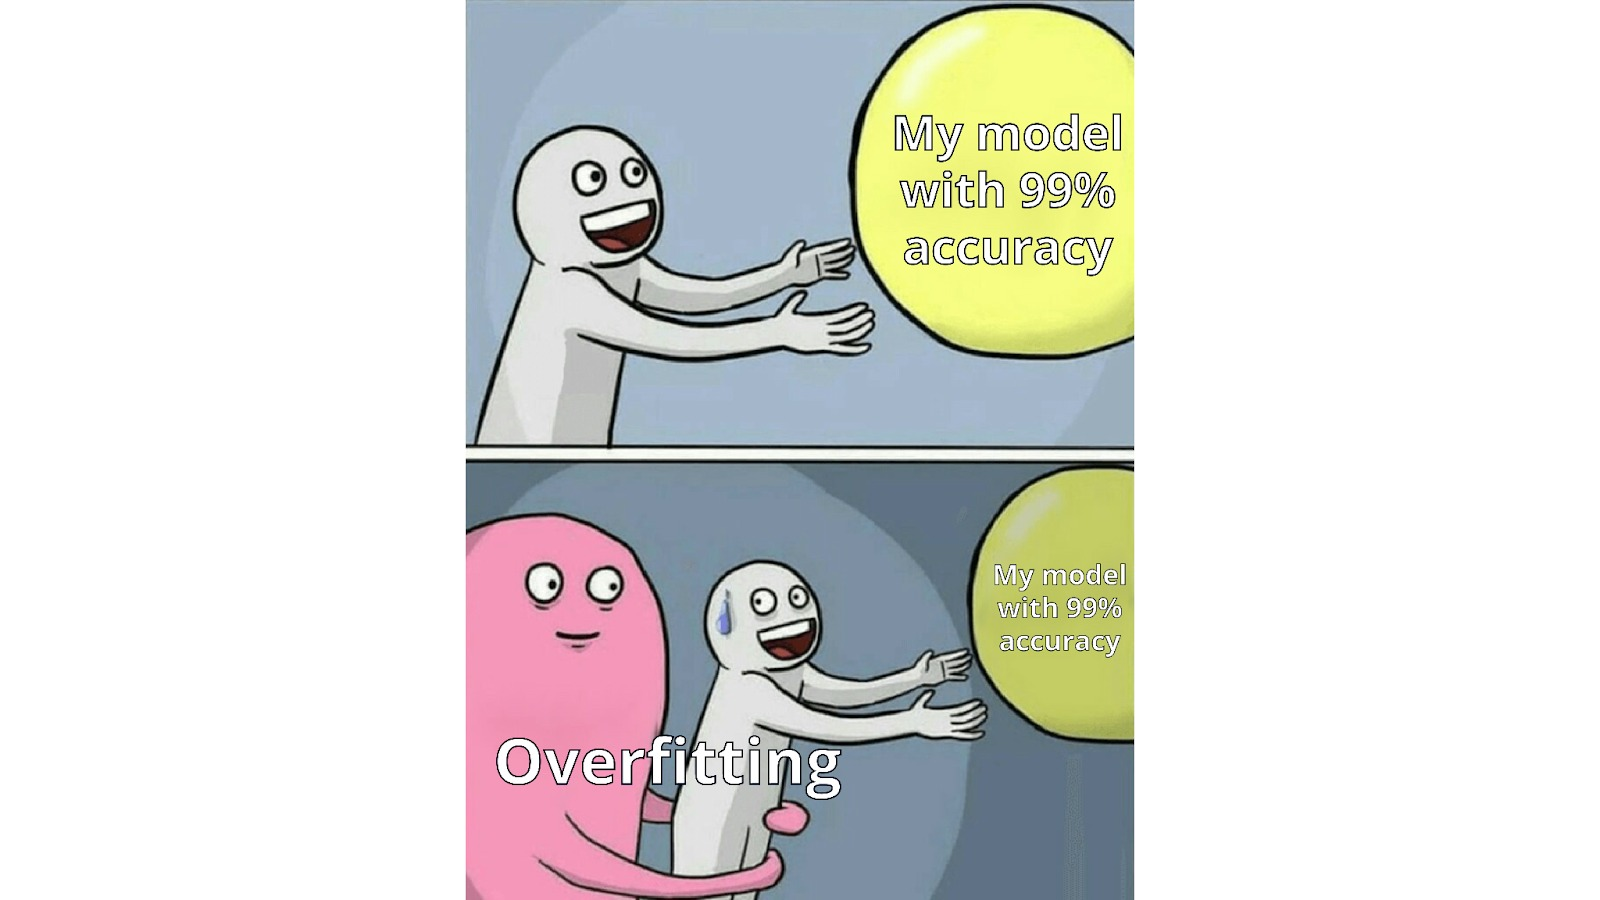

Overfitting pada machine learning dapat terjadi ketika data pelatihan yang kita miliki terlalu sedikit dan tidak merepresentasikan semua kemungkinan dari nilai sesungguhnya. Kondisi lainnya adalah ketika kita memiliki data pelatihan yang sangat banyak, tetapi memiliki informasi yang tidak relevan dengan data di lapangan. Hal ini menyebabkan model harus mempelajari data yang kompleks tetapi tidak memiliki pola yang berguna.

Penyebab di atas juga berlaku pada jaringan saraf tiruan. Terus, apa solusinya dan bagaimana kita mengetahui kualitas dari model neural network? Tenang saja, Anda sudah berada di jalur yang tepat. Pada latihan sebelumnya, kita sudah memisahkan data latih dan data uji sehingga kualitas model melalui evaluasi yang sudah dilakukan dapat terlihat. Sebagai contoh perhatikan tabel berikut.

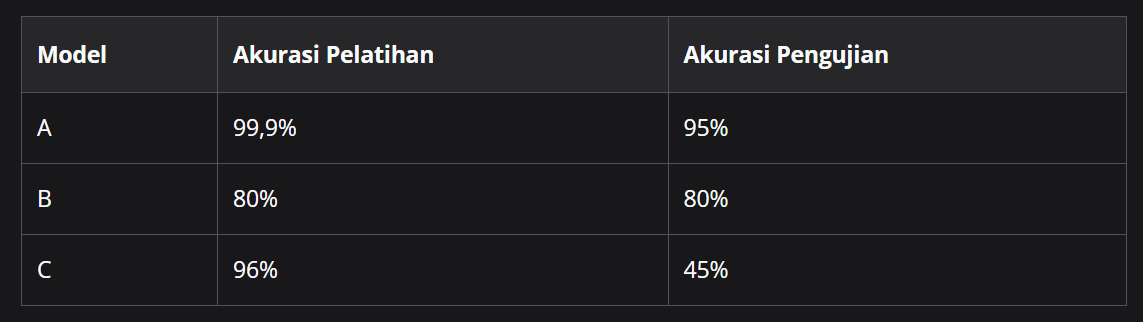

Model A menunjukkan bahwa ada kesenjangan tentang hubungan antara akurasi pelatihan dan pengujian dalam konteks model. Dalam membandingkan model A dan B, model A lebih baik karena memiliki akurasi pengujian yang lebih tinggi. Meskipun ada sedikit penurunan akurasi pengujian itu tidak menunjukkan overfitting yang signifikan. Di sisi lain, model B tidak dipilih karena perbedaan yang kecil antara akurasi pelatihan dan pengujian yang menunjukkan kurangnya generalisasi.

Model C adalah contoh kasus overfitting yang jelas, yaitu dengan akurasi pelatihan tinggi, tetapi akurasi pengujian rendah. Penting untuk mempertimbangkan pengetahuan tentang domain masalah dan karakteristik data untuk menilai tingkat overfitting yang dapat diterima. Sampai di sini cukup terbayang ‘kan untuk menentukan model kita overfitting atau tidak?

Sekarang mari kita bahas beberapa cara untuk mencegah overfitting pada model neural network.

# **Dropout**
Salah satu cara mencegah overfitting adalah dengan menggunakan dropout. Dropout adalah fungsi standar yang umum digunakan industri untuk mencegah overfitting. Seperti yang kita ketahui, semakin kompleks sebuah model machine learning, semakin tinggi kemungkinan model tersebut mengalami overfitting. Dropout bekerja dengan cara mengurangi kompleksitas model neural network tanpa mengubah arsitektur model tersebut.

Lalu, bagaimana cara dropout bekerja? Nama dropout mengacu pada unit/perceptron yang di-dropout (dibuang) secara temporer pada sebuah layer. Contohnya seperti gambar di bawah ini di mana besaran dropout yang dipilih adalah 0.5 sehingga 50% dari perceptron hidden layer kedua dimatikan secara berkala pada saat pelatihan. Dropout memilih neuron yang akan "dimatikan" secara acak selama setiap iterasi pelatihan.

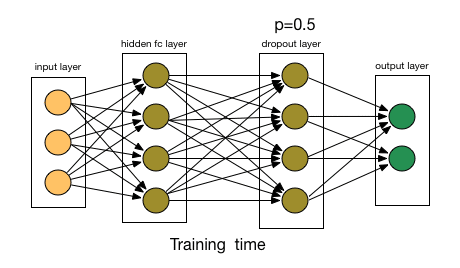


Seperti yang Anda tahu, weight dari setiap neuron pada sebuah layer itu bersifat statis. Hal ini menyebabkan jaringan saraf terlalu menyesuaikan dengan karakteristik pada data latih sehingga menyebabkan overfitting. Nah, penerapan dropout akan membantu mengatasi permasalahan overfitting yang disebabkan oleh permasalahan tersebut.

Untuk mengimplementasikan dropout sendiri sangatlah mudah jika menggunakan Keras. Anda cukup menambahkan layer dropout pada hidden layer di model yang sedang dibuat. Agar lebih jelas perhatikan contoh berikut.

In [ ]:
from keras.layers import Dense, Dropout
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(3, activation='softmax')])

Untuk menggunakan dropout, kita cukup menambahkan fungsi layer tf.keras.layers.Dropout() dan mengisi parameter berupa persentase yang kita inginkan seperti di atas. Dropout akan otomatis menghilangkan jumlah neuron yang aktif pada layer sebelumnya. Sangat mudah, bukan?



# **Batch Normalization**

BatchNormalization adalah layer yang digunakan dalam jaringan saraf tiruan (neural network) untuk mempercepat konvergensi pelatihan dan mengurangi sensitivitas terhadap inisialisasi parameter. Layer ini bekerja dengan melakukan normalisasi input dari layer sebelumnya pada setiap batch sehingga memungkinkan pelatihan yang lebih stabil dan cepat.

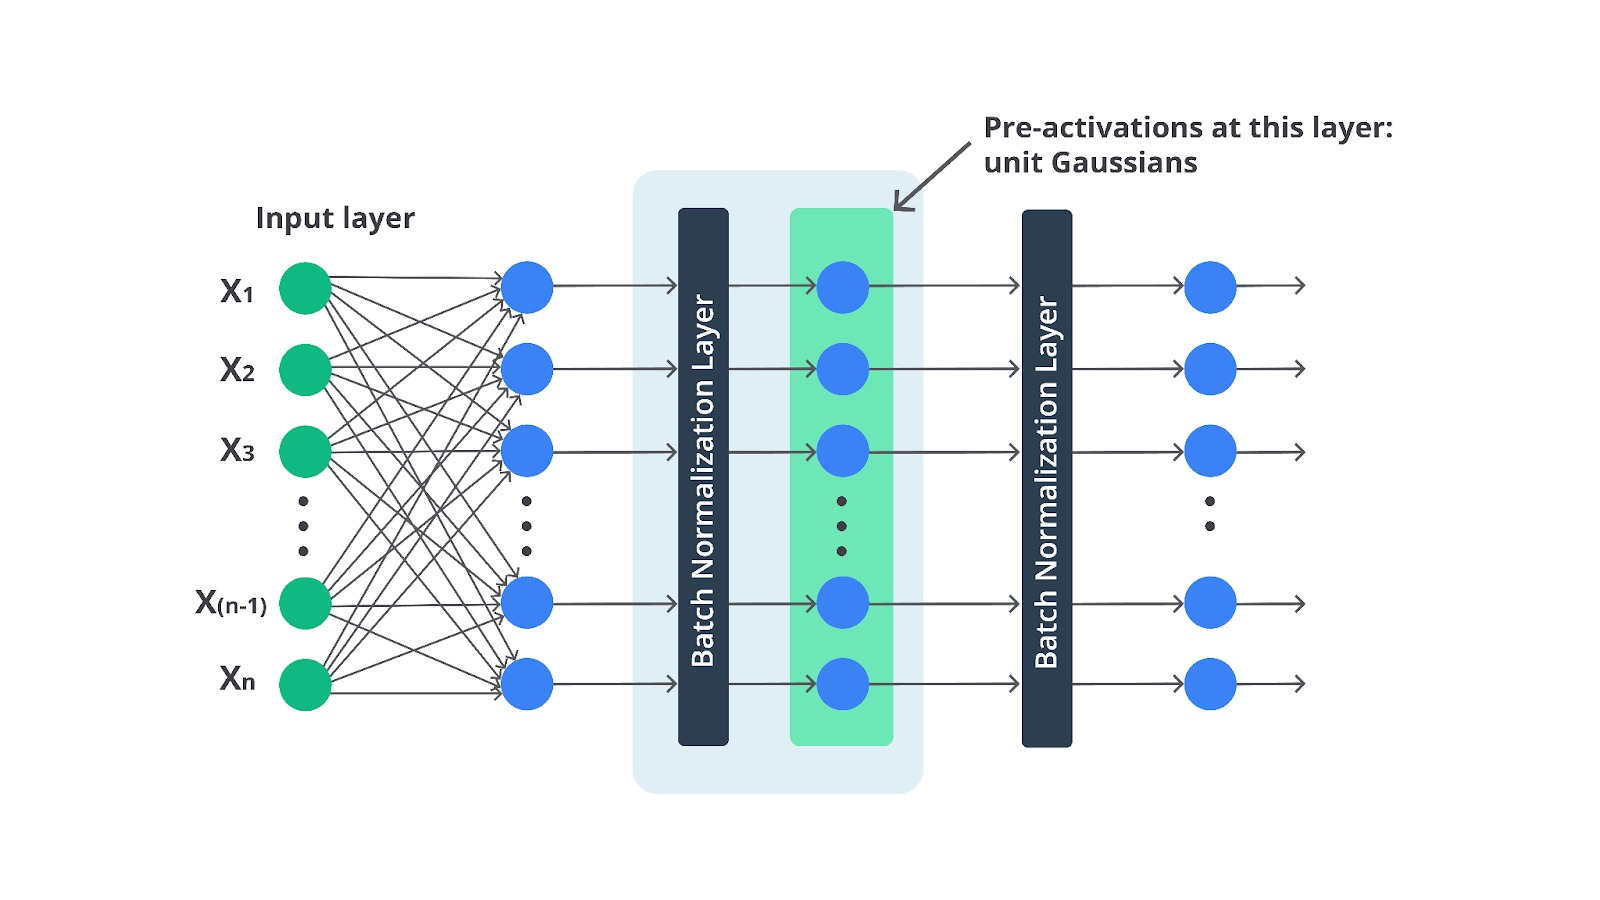

Proses normalisasi dalam BatchNormalization dilakukan dengan mengurangi nilai rata-rata dari setiap batch dan mengukur nilai varian. Kemudian layer ini akan melakukan normalisasi pada data dan melakukan pergeseran selama pelatihan. Hal ini membantu dalam mengatasi masalah seperti gradien menghilang (vanishing gradient) dan memungkinkan mempercepat konvergensi pada model jaringan saraf.

Penggunaan BatchNormalization umum dalam pembangunan model jaringan saraf modern karena kemampuannya untuk meningkatkan stabilitas dan kinerja pembelajaran.

Untuk mengimplementasikan BatchNormalization sendiri sangatlah mudah dengan menggunakan Keras. Anda cukup menambahkan layer BatchNormalization pada model neural network. Agar lebih jelas lihatlah contoh di bawah.

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    BatchNormalization(momentum=0.99),
                    Dense(3, activation='softmax')])

Pada contoh di atas, kita menggunakan salah satu parameter yaitu momentum. Momentum pada BatchNormalization mengacu pada parameter yang dapat mengontrol perhitungan nilai rata-rata dan varians yang dihitung pada setiap batch selama proses pelatihan model. Dengan menggunakan momentum, nilai rata-rata dan varians dihitung berdasarkan gabungan dari nilai-nilai rata-rata dan varians dari mini-batch saat ini dan nilai-nilai sebelumnya yang telah disesuaikan.

Ketika melakukan normalisasi, kita tidak hanya menggunakan nilai dari satu batch saja, tetapi juga mempertimbangkan nilai beberapa batch sebelumnya untuk mendapatkan estimasi yang lebih stabil dari rata-rata dan varians. Ini membantu mengurangi fluktuasi yang mungkin terjadi dalam statistik batch dan meningkatkan konsistensi normalisasi.

Nilai momentum ini sering kali disetel di antara 0,1 dan 0,999. Nilai yang lebih tinggi menunjukkan bahwa kita lebih bergantung pada nilai sebelumnya daripada nilai dari batch saat ini. Sebagai contoh, jika momentum diatur ke 0,9, 90% informasi dari batch sebelumnya akan digunakan dan hanya 10% dari statistik batch saat ini yang akan dipertimbangkan.

Penggunaan momentum pada BatchNormalization membantu menghasilkan data yang lebih stabil dan dapat meningkatkan kinerja pelatihan pada model jaringan saraf tiruan.

Meskipun BatchNormalization dapat membantu mengurangi overfitting, ini bukan jaminan bahwa model tidak akan mengalami overfitting. Overfitting masih dapat terjadi jika model terlalu kompleks untuk jumlah data pelatihan yang sedikit. Selain itu, ada kemungkinan juga terdapat banyak noise pada data, atau jika ada masalah lainnya dengan proses pelatihan.

Sebenarnya, masih ada banyak parameter yang dapat kita atur pada BatchNormalization, tetapi hal yang paling penting terdapat pada momentum. Jika Anda masih penasaran dengan parameter lainnya, silakan baca pada tautan berikut: BatchNormalization.

Sampai di sini, kita sudah dapat mencegah terjadinya overfitting pada model yang akan dibangun. Selanjutnya, Anda dapat melakukan eksperimen menggunakan data yang lebih besar dan model yang lebih kompleks. Namun, ke depannya masih banyak parameter yang dapat Anda pelajari untuk membangun model yang lebih baik. Jangan terlalu cepat berpuas diri, ya. Sampai jumpa di materi berikutnya.